In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt1
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn import metrics

In [111]:
xls1=pd.ExcelFile(r'Karnataka.xlsx',engine='openpyxl')

In [112]:
xls1.sheet_names

['GSVA_cur', 'GSVA_const', 'NSVA_cur', 'NSVA_const']

In [113]:
df1=pd.read_excel(xls1,sheet_name='GSVA_cur')

In [114]:
df1.head()

,State :,Karnataka,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,As on 31.07.2020,Unnamed: 8,Unnamed: 9,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,Gross State Value Added by economic activity a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,(Rs. in lakh),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,S.No.,Item,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.,"Agriculture, forestry and fishing",7.55487e+06,8.18061e+06,9.66614e+06,1.08959e+07,1.12404e+07,1.20553e+07,1.49199e+07,1.54697e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
type(xls)

pandas.core.frame.DataFrame

In [117]:
list(df1.columns)

['State :',
 'Karnataka',
 'Unnamed: 2',
 'Unnamed: 3',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'As on 31.07.2020',
 'Unnamed: 8',
 'Unnamed: 9',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Unnamed: 15',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 'Unnamed: 26',
 'Unnamed: 27',
 'Unnamed: 28',
 'Unnamed: 29',
 'Unnamed: 30']

In [134]:
df1.columns

Index(['State :', 'Karnataka', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'As on 31.07.2020', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30'],
      dtype='object')

In [137]:
df1.columns=df1.loc[3]

In [140]:
df=df1.iloc[4:,:].reset_index()

In [141]:
df.head()

3,index,S.No.,Item,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,4,1.,"Agriculture, forestry and fishing",7.55487e+06,8.18061e+06,9.66614e+06,1.08959e+07,1.12404e+07,1.20553e+07,1.49199e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,1.1,Crops,5.33946e+06,5.74954e+06,6.98851e+06,7.86201e+06,7.97384e+06,8.20988e+06,1.06499e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6,1.2,Livestock,1.34966e+06,1.50699e+06,1.63407e+06,1.87168e+06,1.97625e+06,2.28727e+06,2.63095e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7,1.3,Forestry and logging,593458,604866,658629,661817,840136,1.12019e+06,1.01953e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,1.4,Fishing and aquaculture,272293,319207,384938,500390,450147,438000,619515,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
df.drop(['S.No.','index'],axis=1,inplace=True)

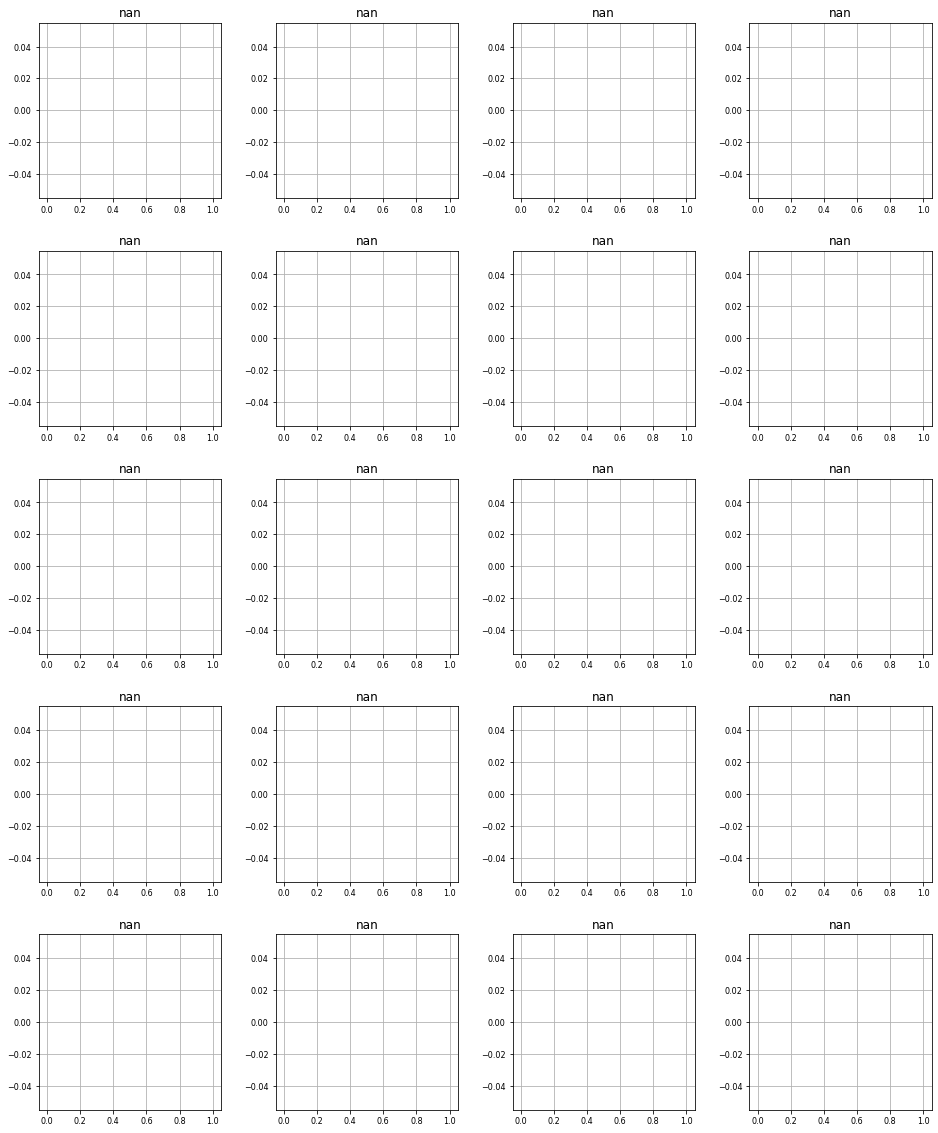

In [148]:
df.hist(figsize=(16, 20), bins=20, xlabelsize=8, ylabelsize=8);

In [144]:
df.columns.unique()

Index([   'Item', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16',
       '2016-17', '2017-18', '2018-19', '2019-20',       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan],
      dtype='object', name=3)

In [145]:
df2=df.transpose()

In [146]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,985,986,987,988,989,990,991,992,993,994
3,,,,,,,,,,,,,,,,,,,,,
Item,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility...",Construction,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12,7.55487e+06,5.33946e+06,1.34966e+06,593458,272293,450254,8.00512e+06,9.71389e+06,1.08288e+06,5.03315e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-13,8.18061e+06,5.74954e+06,1.50699e+06,604866,319207,407345,8.58795e+06,1.08505e+07,1.14784e+06,5.23395e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-14,9.66614e+06,6.98851e+06,1.63407e+06,658629,384938,617181,1.02833e+07,1.17943e+07,1.27559e+06,5.94013e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-15,1.08959e+07,7.86201e+06,1.87168e+06,661817,500390,851636,1.17475e+07,1.20085e+07,1.44628e+06,6.13749e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
df2.loc['Unnamed: 1']

KeyError: 'Unnamed: 1'

In [73]:
df2.columns=df2.loc['Unnamed:1']
df2=df2[1:]

KeyError: 'Unnamed:1'

In [59]:
df2

2012-13,8180610.0,5749544.0,1506993.0,604866.0,319207.0,407345.0,8587955.0,10850509.0,1147835.0,5233950.0,...,3837408.0,37335544.0,63155792.0,8182953.0,1797441.0,69541305.0,621510.0,111891.0,NaN,NaN
2013-14,9.66614e+06,6.98851e+06,1.63407e+06,658629,384938,617181,1.02833e+07,1.17943e+07,1.2756e+06,5.94013e+06,...,4.50158e+06,4.4744e+07,7.40373e+07,9.70444e+06,2.07516e+06,8.16666e+07,628270,129986,NaN,NaN
2014-15,1.08959e+07,7.86201e+06,1.87168e+06,661817,500390,851636,1.17475e+07,1.20085e+07,1.44628e+06,6.13749e+06,...,5.33221e+06,5.17918e+07,8.31316e+07,1.07453e+07,2.48455e+06,9.13923e+07,635100,143902,NaN,NaN
2015-16,1.12404e+07,7.97384e+06,1.97625e+06,840136,450147,610227,1.18506e+07,1.42661e+07,1.66967e+06,6.11061e+06,...,6.06323e+06,6.03698e+07,9.42669e+07,1.26376e+07,2.38768e+06,1.04517e+08,642010,162796,NaN,NaN
2016-17,1.20553e+07,8.20988e+06,2.28727e+06,1.12019e+06,438000,679148,1.27345e+07,1.82184e+07,1.52131e+06,6.43106e+06,...,7.05313e+06,6.95871e+07,1.08492e+08,1.46461e+07,2.22482e+06,1.20914e+08,649000,186308,NaN,NaN
2017-18,1.49199e+07,1.06499e+07,2.63095e+06,1.01953e+06,619515,939077,1.5859e+07,1.97493e+07,1.78237e+06,7.2573e+06,...,8.11332e+06,7.75684e+07,1.22216e+08,1.61034e+07,2.56176e+06,1.35758e+08,656060,206929,NaN,NaN
2018-19,1.54697e+07,1.07912e+07,3.11072e+06,1.08099e+06,486825,815909,1.62856e+07,2.19693e+07,1.96921e+06,7.9907e+06,...,9.73679e+06,9.0143e+07,1.38358e+08,1.89193e+07,2.83724e+06,1.5444e+08,663190,232874,NaN,NaN
2019-20,1.66573e+07,1.13048e+07,3.63335e+06,1.13223e+06,586918,834668,1.7492e+07,2.32708e+07,2.21152e+06,8.36201e+06,...,1.11955e+07,1.00519e+08,1.51855e+08,2.11064e+07,3.05022e+06,1.69912e+08,670410,253444,NaN,NaN


In [40]:
df2.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    9
dtype: int64

In [41]:
df2['Fishing and aquaculture'].hist(figsize=(10, 10), bins=15)

KeyError: 'Fishing and aquaculture'

In [16]:

X=df2.drop('Per Capita GSDP (Rs.)',axis=1)

y=df2['Per Capita GSDP (Rs.)']


KeyError: "['Per Capita GSDP (Rs.)'] not found in axis"

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=0)

NameError: name 'X' is not defined

In [18]:
X_train.head()

NameError: name 'X_train' is not defined

In [19]:
svc=LinearSVC()
svc.fit(X_train,y_train)

NameError: name 'X_train' is not defined

In [20]:
y_predict=svc.predict(X_test)
y_predict

NameError: name 'X_test' is not defined

In [21]:
metrics.accuracy_score(y_test,y_predict)

NameError: name 'y_test' is not defined